In [3]:
#libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [4]:
db = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [5]:
db.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [7]:
db.shape

(1034, 9)

In [8]:
db.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

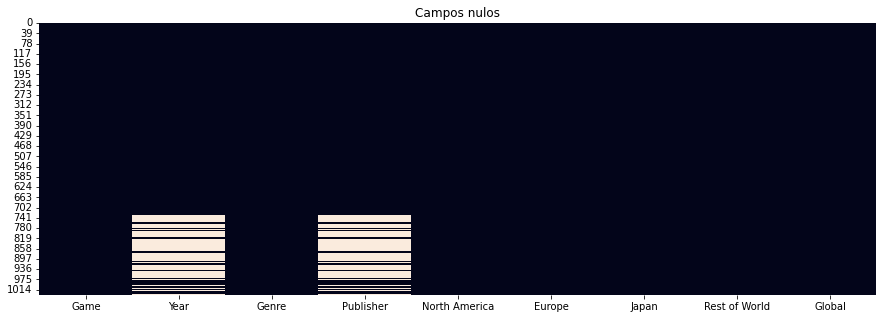

In [9]:
#analise grafica dos campos nulos
plt.figure(figsize=(15,5))
plt.title('Campos nulos')
sns.heatmap(db.isnull(), cbar=False);

In [10]:
#deletando as linhas nulas
db.dropna(inplace=True)

In [11]:
db.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


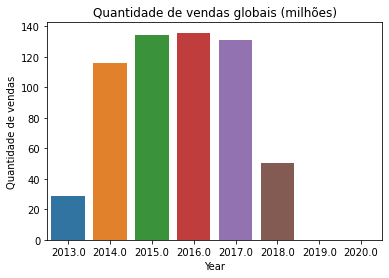

In [12]:
#analisando a quantidade de vendas globais
plt.title('Quantidade de vendas globais (milhões)', loc='center')
sns.barplot(data=db, x='Year', y='Global', ci=None, estimator=sum)
plt.ylabel('Quantidade de vendas');

In [13]:
#retirando os anos nulos
db = db.loc[ (db['Year'] != 2019) & (db['Year'] != 2020)]
db.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


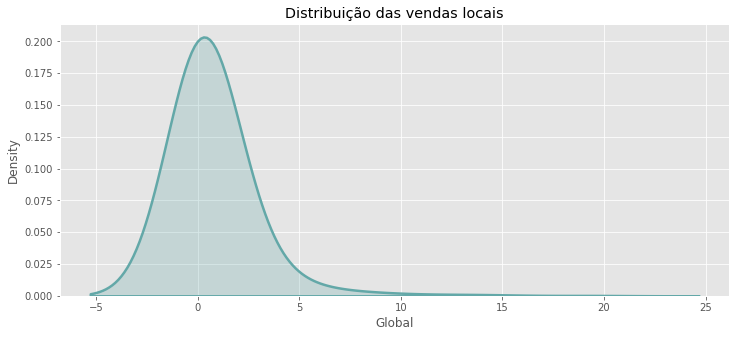

In [14]:
#verificando a distribuição das vendas pelo mundo
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.title('Distribuição das vendas locais')

sns.kdeplot(db['Global'],shade=True, bw=1, color='#63a8a8', linewidth=2.5);

In [15]:
db.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


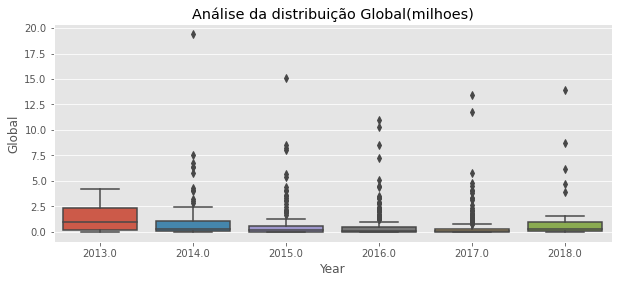

In [16]:
plt.figure(figsize=(10,4))
plt.title('Análise da distribuição Global(milhoes)')

sns.boxplot(data=db, x='Year', y='Global');

In [17]:
#verificando os games que venderam mais de 10 milhões
db.loc[db['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [18]:
Analise = db.groupby( by=['Year'] ).sum().reset_index()

#analisando a proporção dos 100% de cada continemente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

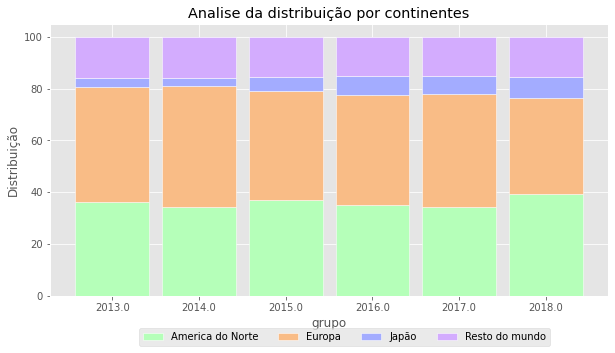

In [19]:
#análise gráfica da proporção de vendas em cada continente
largura = 0.85
rotulos = Analise['Year']
grupos = [0,1,2,3,4,5]

plt.figure(figsize=(10,5))
plt.title('Analise da distribuição por continentes')

#America
plt.bar(grupos, America, width=largura, color='#b5ffb9', edgecolor='white')
#Europa
plt.bar(grupos, Europa,bottom=America, width=largura, color='#f9bc86', edgecolor='white')
#Japao
plt.bar(grupos, Japao, bottom = [A+B for A,B in zip(America, Europa)], width=largura, color='#a3acff', edgecolor='white')
#Resto do mundo
plt.bar(grupos, Mundo, bottom = [A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura, color='#d3acfe', edgecolor='white')


plt.xticks(grupos, rotulos)
plt.xlabel('grupo')
plt.ylabel('Distribuição')
plt.legend(['America do Norte', 'Europa','Japão','Resto do mundo'],loc='upper left',bbox_to_anchor=(0.15,-0.1), ncol=4);

In [20]:
db['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [21]:
#transformando variaveis qualitativas em variaveis numéricas
f_Label = LabelEncoder()
db['Produtor-numerico'] = f_Label.fit_transform(db['Publisher'])
db['Genero-numerico'] = f_Label.fit_transform(db['Genre'])
db['Jogo-numerico'] = f_Label.fit_transform(db['Game'])
db.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor-numerico,Genero-numerico,Jogo-numerico
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [22]:
#paleta de cores
paleta = sns.color_palette('husl',8)
paleta

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

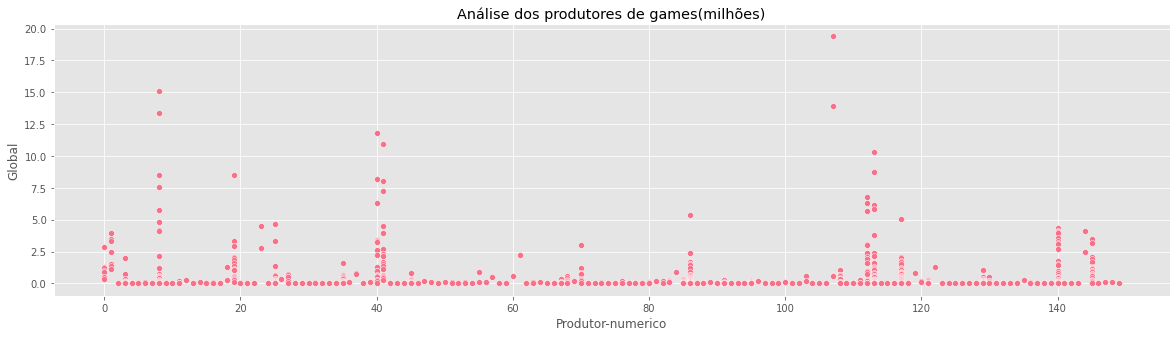

In [23]:
plt.figure(figsize=(20,5))
plt.title('Análise dos produtores de games(milhões)')
sns.scatterplot(data=db, x='Produtor-numerico', y='Global', color=paleta[0]);

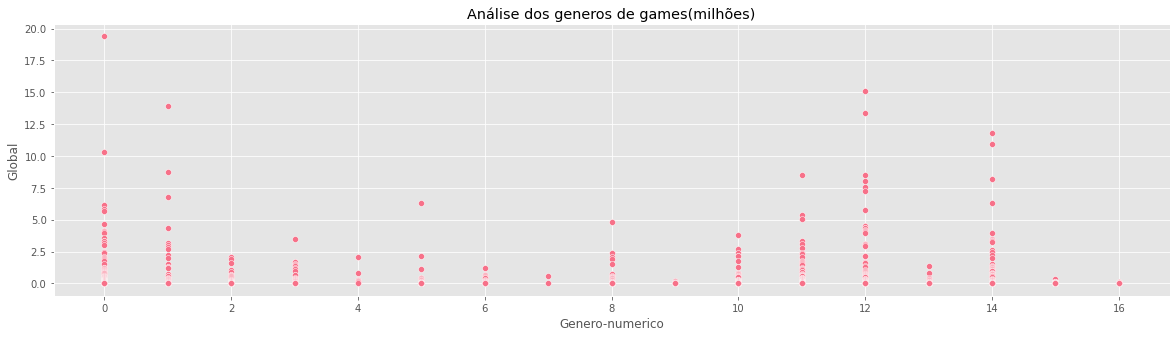

In [24]:
plt.figure(figsize=(20,5))
plt.title('Análise dos generos de games(milhões)')
sns.scatterplot(data=db, x='Genero-numerico', y='Global', color=paleta[0]);

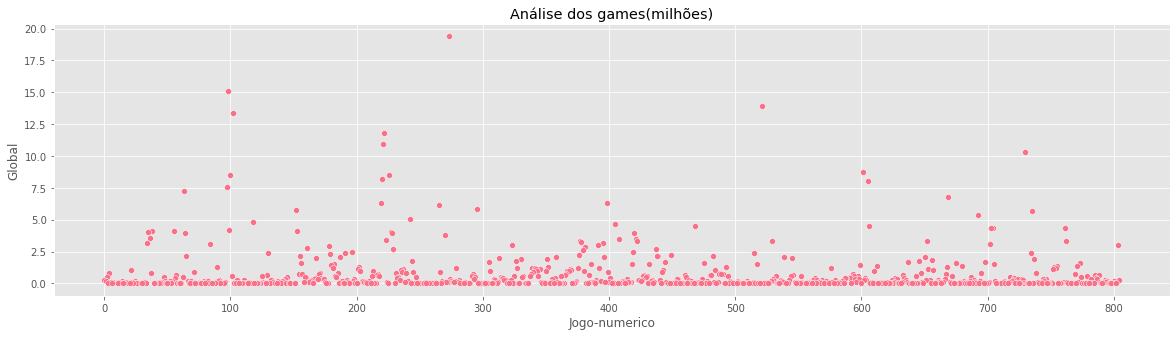

In [25]:
plt.figure(figsize=(20,5))
plt.title('Análise dos games(milhões)')
sns.scatterplot(data=db, x='Jogo-numerico', y='Global', color=paleta[0])

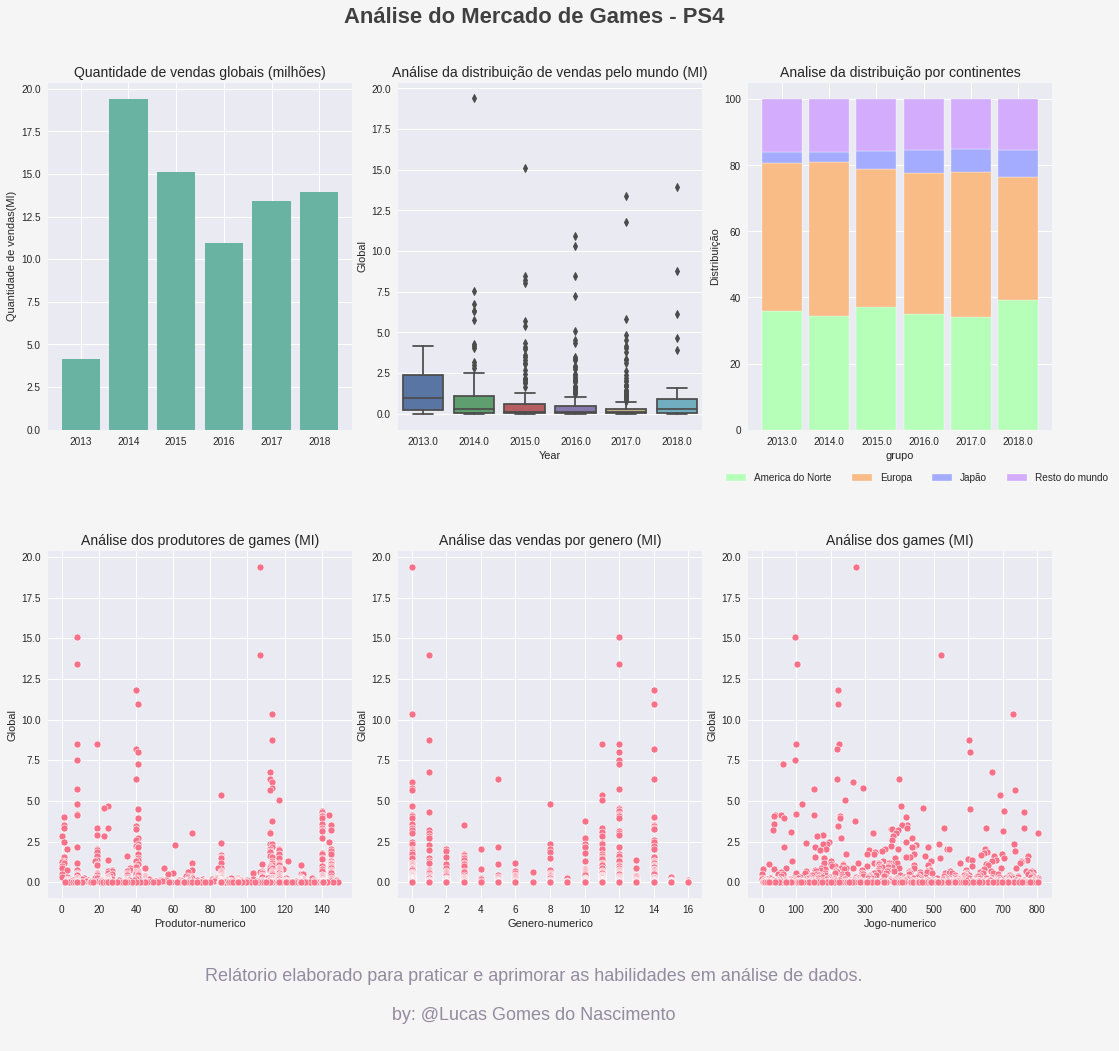

In [77]:
#Relátorio
fig, ax = plt.subplots(figsize=(18, 15))

#parametros
colunas = 3
linhas = 2
cor_fundo = '#f5f5f5'
ax.set_facecolor(cor_fundo)
fig.set_facecolor(cor_fundo)
plt.style.use('seaborn')
plt.suptitle('Análise do Mercado de Games - PS4',y=0.95, fontsize=22, color='#404040', fontweight=600)


#gráfico 1
plt.subplot(linhas, colunas, 1)
plt.title('Quantidade de vendas globais (milhões)', loc='center',fontsize=14)
plt.bar(db['Year'], db['Global'], color='#69b3a2')
plt.ylabel('Quantidade de vendas(MI)')

#gráfico 2
plt.subplot(linhas, colunas, 2)
plt.title('Análise da distribuição de vendas pelo mundo (MI)', loc='center', fontsize=14)
sns.boxplot(data=db, x='Year', y='Global')

#gráfico 3
plt.subplot(linhas, colunas, 3)
plt.title('Analise da distribuição por continentes', loc='center',fontsize=14)
#subparametros
rotulos = Analise['Year']
largura = 0.85
grupos = [0,1,2,3,4,5]

#America
plt.bar(grupos, America, width=largura, color='#b5ffb9', edgecolor='white')
#Europa
plt.bar(grupos, Europa,bottom=America, width=largura, color='#f9bc86', edgecolor='white')
#Japao
plt.bar(grupos, Japao, bottom = [A+B for A,B in zip(America, Europa)], width=largura, color='#a3acff', edgecolor='white')
#Resto do mundo
plt.bar(grupos, Mundo, bottom = [A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura, color='#d3acfe', edgecolor='white')
#labels
plt.xticks(grupos, rotulos)
plt.xlabel('grupo')
plt.ylabel('Distribuição')
plt.legend(['America do Norte', 'Europa','Japão','Resto do mundo'],loc='upper left',bbox_to_anchor=(-0.1,-0.1), ncol=4);

#gráfico 4
plt.subplot(linhas, colunas, 4)
plt.title('Análise dos produtores de games (MI)', loc='center', fontsize=14)
sns.scatterplot(data=db, x='Produtor-numerico', y='Global', color=paleta[0])

#gráfico 5
plt.subplot(linhas, colunas, 5)
plt.title('Análise das vendas por genero (MI)', loc='center', fontsize=14)
sns.scatterplot(data=db, x='Genero-numerico', y='Global', color=paleta[0])

#gráfico 6
plt.subplot(linhas, colunas, 6);
plt.title('Análise dos games (MI)', loc='center', fontsize=14)
sns.scatterplot(data=db, x='Jogo-numerico', y='Global', color=paleta[0])


#ajustando o layout dos gráficos
plt.subplots_adjust(hspace=0.35,wspace=0.15)

#rodape
rodape = '''
Relátorio elaborado para praticar e aprimorar as habilidades em análise de dados.

by: @Lucas Gomes do Nascimento
'''

fig.text(0.5,-0.01, rodape, ha='center', va='bottom', size=18, color='#938ca1');